In [1]:
import pandas as pd
merged_df = pd.read_csv('Merged_DatasetV2.csv')
merged_df.head()


/var/folders/rf/qbnw5dmn5dq1gms0pls5p4b40000gn/T/ipykernel_5332/647249361.py:2: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_DatasetV2.csv')


,Unnamed: 0,id,type,name,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,Columbia (CBS) Studio ‘B’,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,New Theatre Oxford,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,Santuario della Beata Vergine di Ariadello,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,ROKU-st,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,Rätschenmühle,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN


In [2]:
# Drop rows where 'services_offered' is null
merged_df = merged_df.dropna(subset=['services_offered'])

# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'name'])

# Display the updated dataframe
merged_df.head()


,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,34.0,Active,recorded at


In [3]:
# Split the 'services_offered' column by commas and explode the dataframe
merged_df['services_offered'] = merged_df['services_offered'].str.split(', ')
merged_df = merged_df.explode('services_offered')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,34.0,Active,recorded at


In [4]:
# Impute "Missing" for null categorical variables
categorical_columns = ['type', 'city', 'state', 'county', 'country']
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Missing')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,Missing,Missing,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,34.0,Active,recorded at


In [5]:
from sklearn.impute import SimpleImputer

# Create an imputer object with median strategy and add_indicator=True
imputer = SimpleImputer(strategy='median', add_indicator=True)

# Fit and transform the 'lifespan_years' column
lifespan_imputed = imputer.fit_transform(merged_df[['lifespan_years']])

# Create new columns for the imputed values and the indicator
merged_df['lifespan_years'] = lifespan_imputed[:, 0]
merged_df['lifespan_years_missing'] = lifespan_imputed[:, 1]

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered,lifespan_years_missing
15520,Other,Los Jarales,Missing,Missing,VE,43.0,Active,recorded at,1.0
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at,0.0
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,43.0,Active,recorded at,1.0
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,5.0,Ended,engineered at,0.0
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,34.0,Active,recorded at,0.0


In [6]:
# Identify categorical columns (all columns except 'lifespan_years')
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding on the categorical columns
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Convert boolean values to 0 or 1
merged_df_encoded = merged_df_encoded.astype(int)

# Display the updated dataframe
merged_df_encoded.head()

,lifespan_years,lifespan_years_missing,type_Amphitheatre,type_Club,type_Concert hall / Theatre,type_Educational institution,type_Festival stage,type_Indoor arena,type_Missing,type_Other,...,services_offered_engineered at,services_offered_lyrics written at,services_offered_mixed at,services_offered_premiere,services_offered_produced at,services_offered_recorded at,services_offered_remixed at,services_offered_revised at,services_offered_video shot at,services_offered_written at
15520,43,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15521,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15522,43,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15524,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15525,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


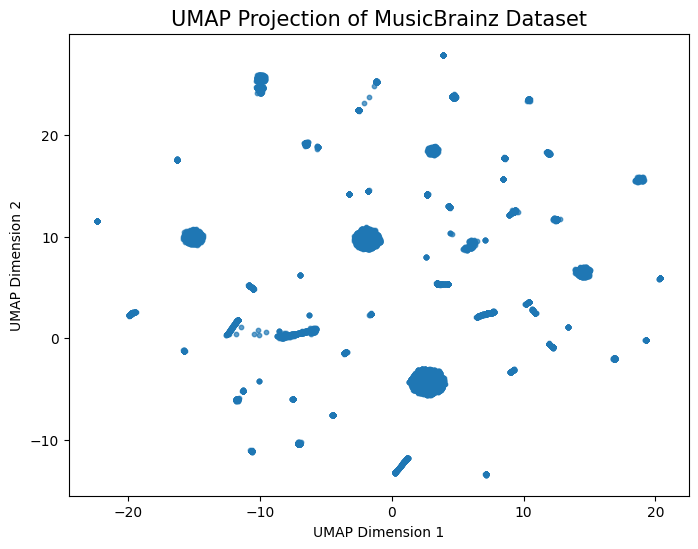

In [7]:
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------
# 1. Load or define your pre-processed data
#    (We assume merged_df_encoded is already
#     encoded and has no missing values.)

# If you already have it in memory, just assign:
# merged_df_encoded = ...

# For demonstration, let's assume merged_df_encoded is loaded as follows:
# merged_df_encoded = pd.read_csv('path_to_your_file.csv')

# ----------------------------------------------------
# 2. Separate features from any target/labels (if applicable)
#    If you don't have a target column, just use the entire DataFrame.
X = merged_df_encoded.values  # Convert DataFrame to a NumPy array

# ----------------------------------------------------
# 3. Optional: Scale data
#    UMAP is sensitive to scale, so standardizing or normalizing is often useful.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------
# 4. Create and fit the UMAP model
#    Adjust parameters such as n_neighbors, min_dist, etc., as needed.
reducer = umap.UMAP(
    n_neighbors=15,   # typical default, can tune
    n_components=2,   # 2D for visualization
    min_dist=0.1,     # controls how tightly points are clustered
    metric='euclidean',
    random_state=42    # for reproducibility
)

# Perform the dimensionality reduction
X_umap = reducer.fit_transform(X_scaled)

# ----------------------------------------------------
# 5. Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# ----------------------------------------------------
# X_umap now holds the 2D embedding of your data, which
# you can use for clustering, further visualization, etc.


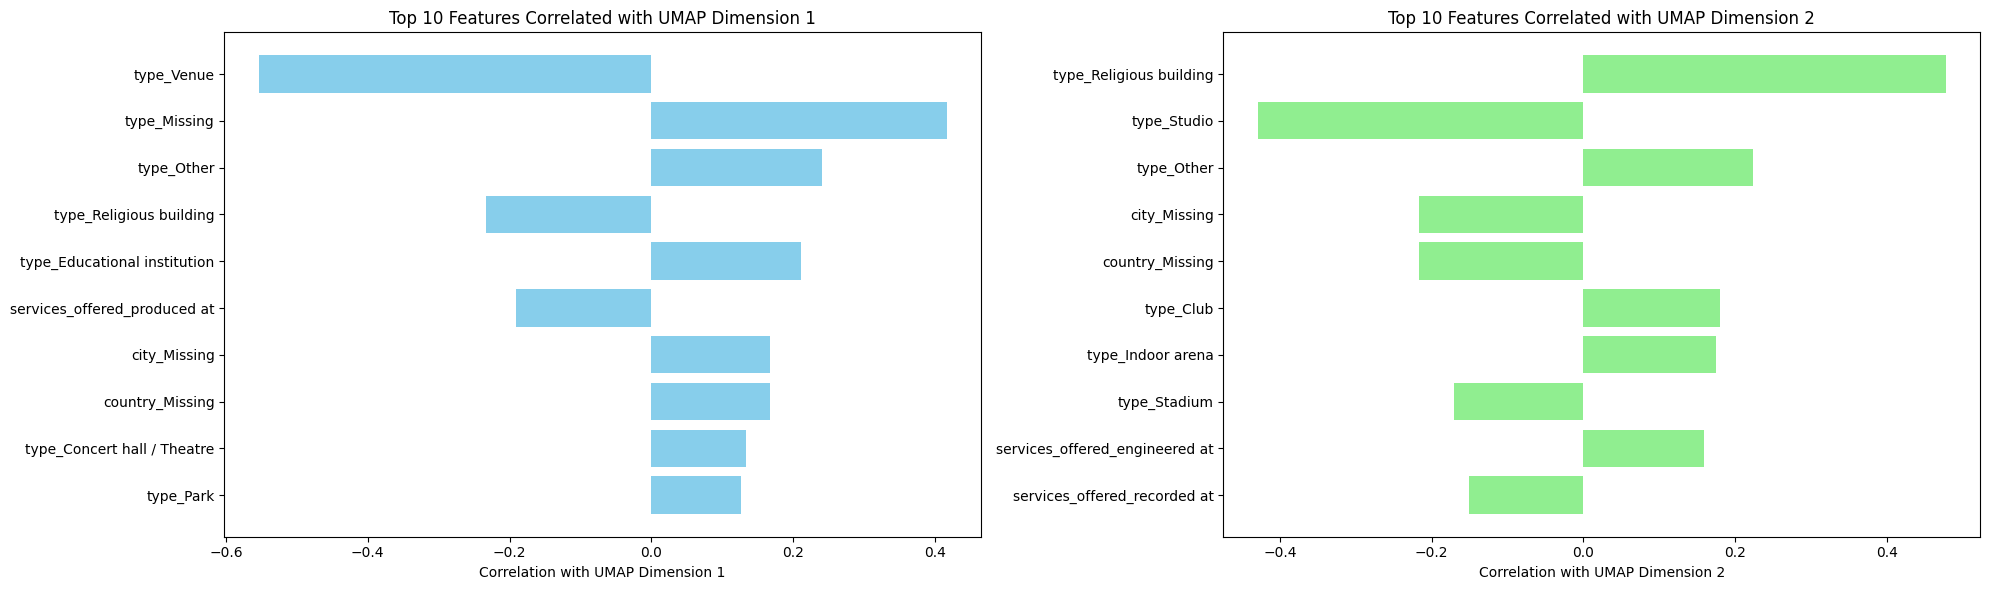

In [8]:
# Analysis for UMAP Dimension 1
correlations_dim1 = []
for col in merged_df_encoded.columns:
    corr = np.corrcoef(merged_df_encoded[col], X_umap[:, 0])[0, 1]
    correlations_dim1.append((col, corr))

# Sort and look at the highest absolute correlations
sorted_correlations_dim1 = sorted(correlations_dim1, key=lambda x: abs(x[1]), reverse=True)

# Extract the top 10 highest absolute correlations
top_features_dim1 = sorted_correlations_dim1[:10]
features_dim1 = [feature for feature, _ in top_features_dim1]
correlations_dim1 = [corr for _, corr in top_features_dim1]

# Analysis for UMAP Dimension 2
correlations_dim2 = []
for col in merged_df_encoded.columns:
    corr = np.corrcoef(merged_df_encoded[col], X_umap[:, 1])[0, 1]
    correlations_dim2.append((col, corr))

# Sort and look at the highest absolute correlations
sorted_correlations_dim2 = sorted(correlations_dim2, key=lambda x: abs(x[1]), reverse=True)

# Extract the top 10 highest absolute correlations
top_features_dim2 = sorted_correlations_dim2[:10]
features_dim2 = [feature for feature, _ in top_features_dim2]
correlations_dim2 = [corr for _, corr in top_features_dim2]

# Plot the bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Bar chart for Dimension 1
axes[0].barh(features_dim1, correlations_dim1, color='skyblue')
axes[0].set_xlabel('Correlation with UMAP Dimension 1')
axes[0].set_title('Top 10 Features Correlated with UMAP Dimension 1')
axes[0].invert_yaxis()  # Highest correlation at the top

# Bar chart for Dimension 2
axes[1].barh(features_dim2, correlations_dim2, color='lightgreen')
axes[1].set_xlabel('Correlation with UMAP Dimension 2')
axes[1].set_title('Top 10 Features Correlated with UMAP Dimension 2')
axes[1].invert_yaxis()  # Highest correlation at the top

plt.tight_layout()
plt.show()

Based on these feature correlation plots:

For Dimension 1:
The right side is likely to have missing Type, City, and Country values along with Concert Hall/Theatre, Other and Park. The left side is likely to have Venue and Religious Building Types along with the production value for services_offered.

For Dimension 2:
Religious Buildings, Clubs, Indoor Arenas, and Type Other are likely to be in the upper section of the UMAP visual, along with the engineering service. Studios, Stadiums, and missing values for Country and city are likely to be in the lower section along with the recording service.

Overall Intuition:
Missing City and Country values are likely to be on the lower right side along with Other types. Religious Buildings are likely to be in the upper left section.

The next step is to test these intuitions by isolating these subsets of interest in a visualization.

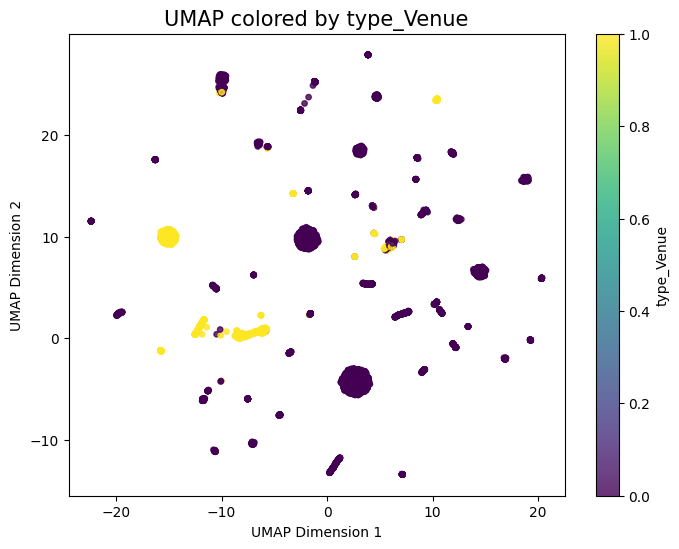

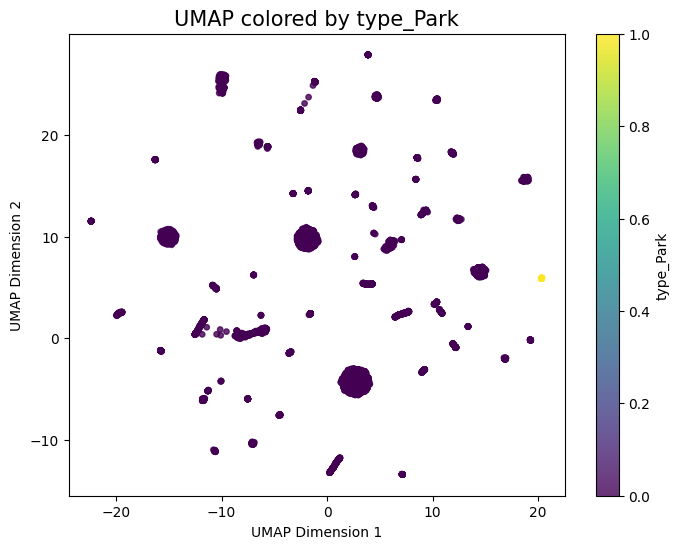

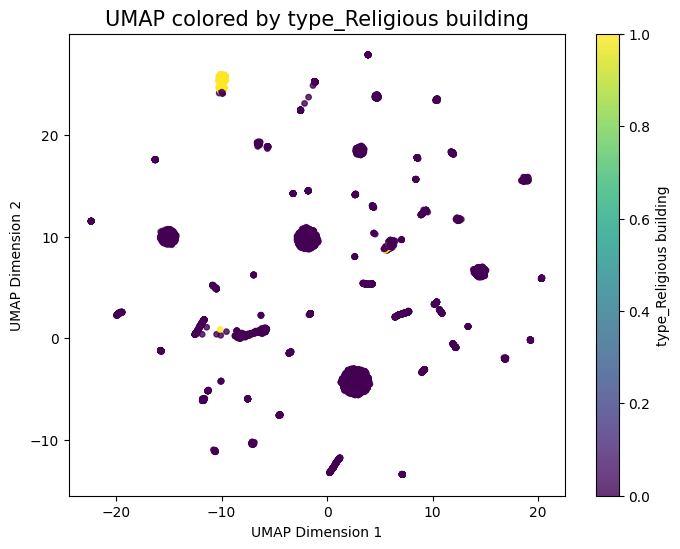

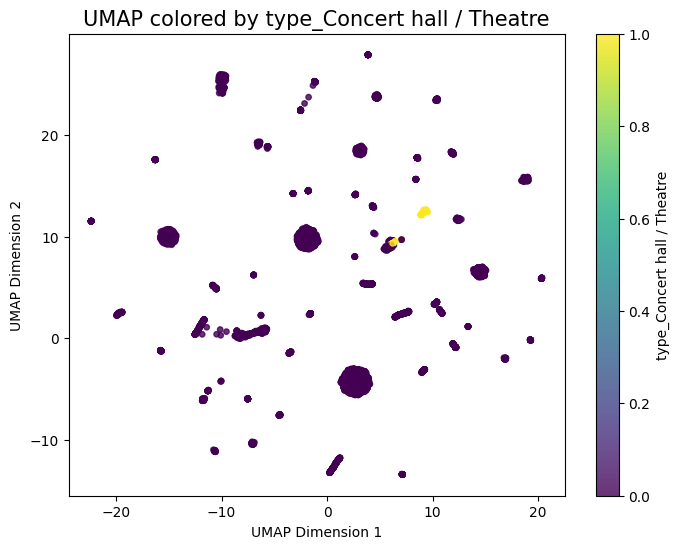

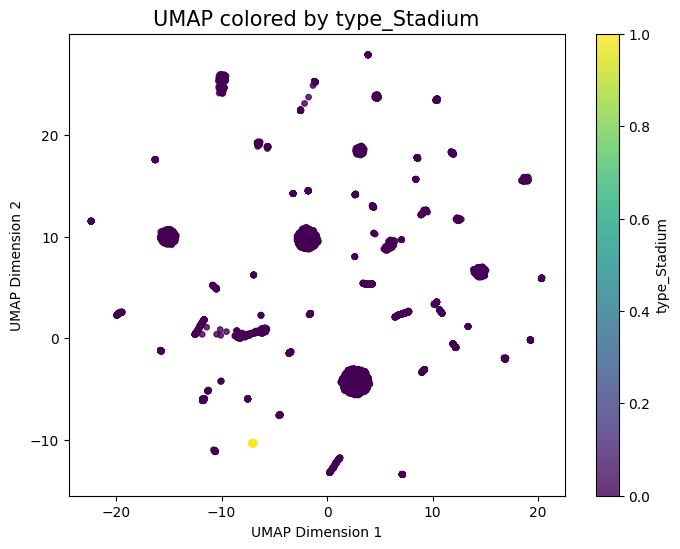

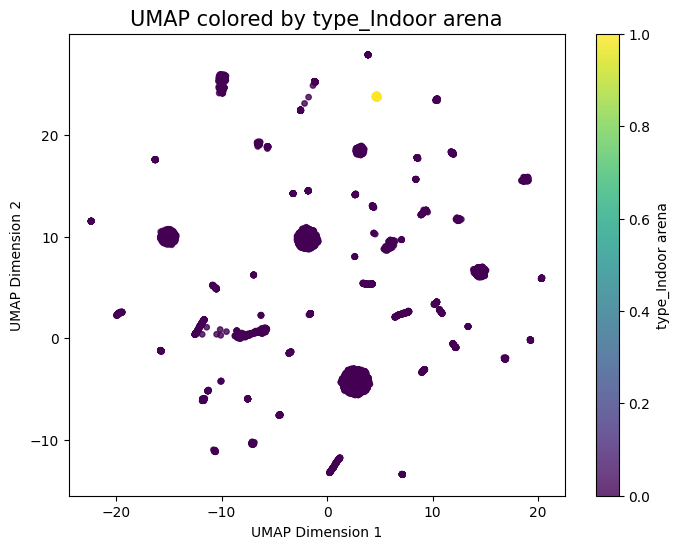

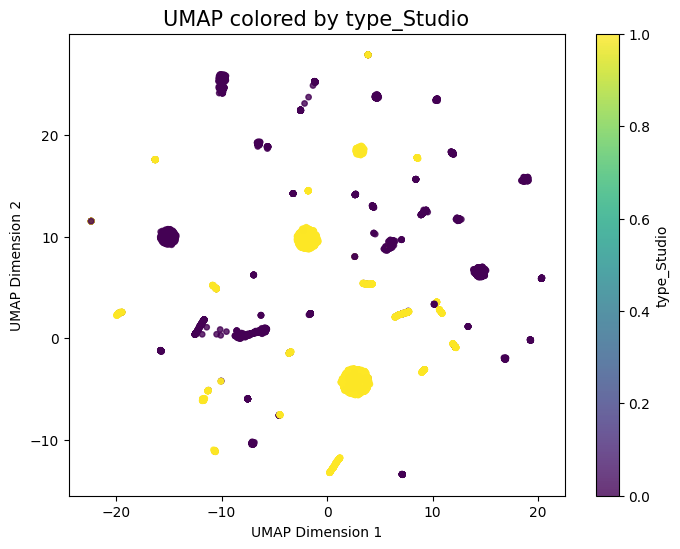

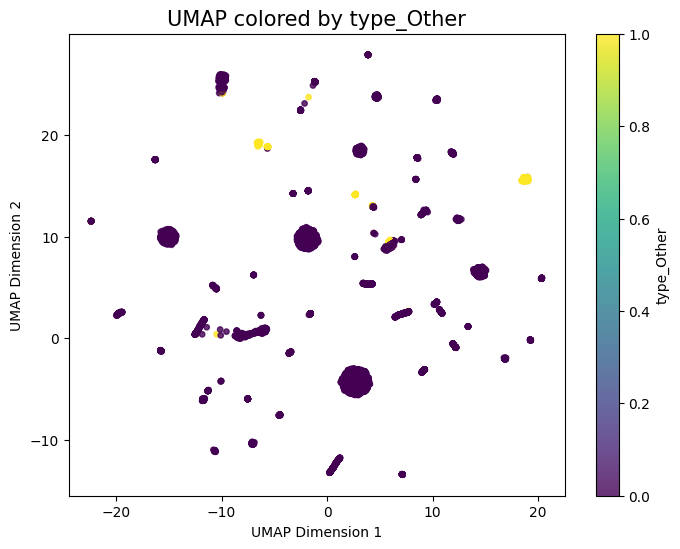

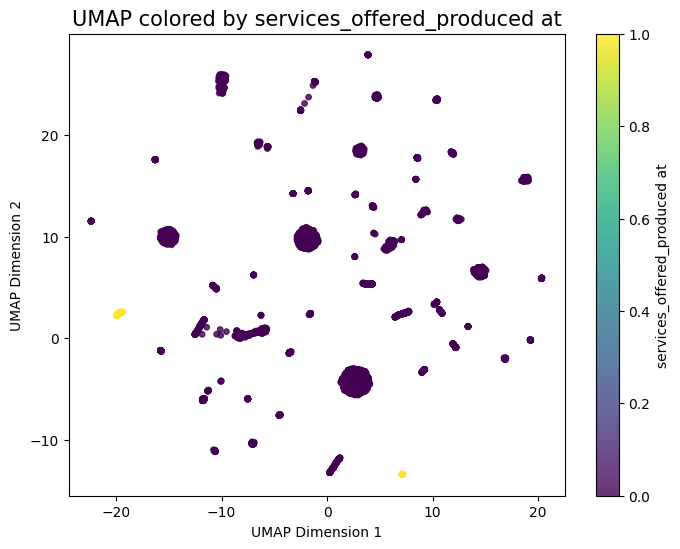

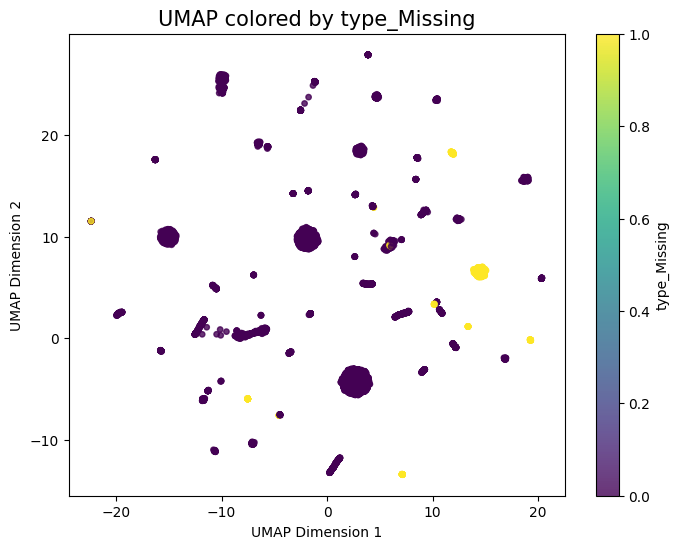

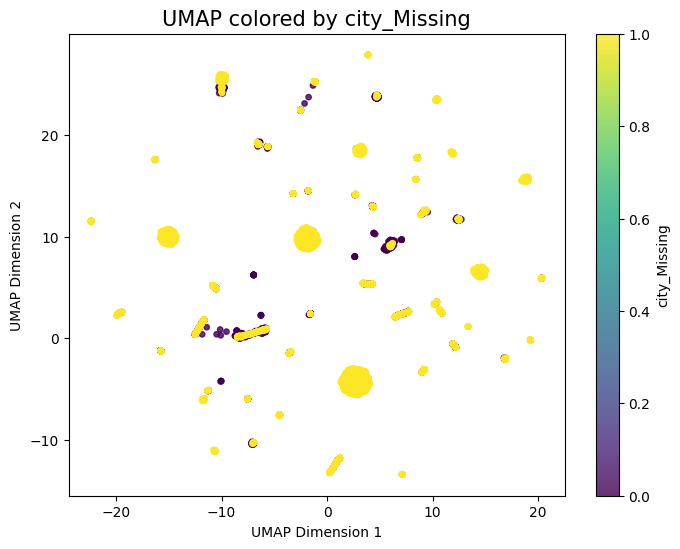

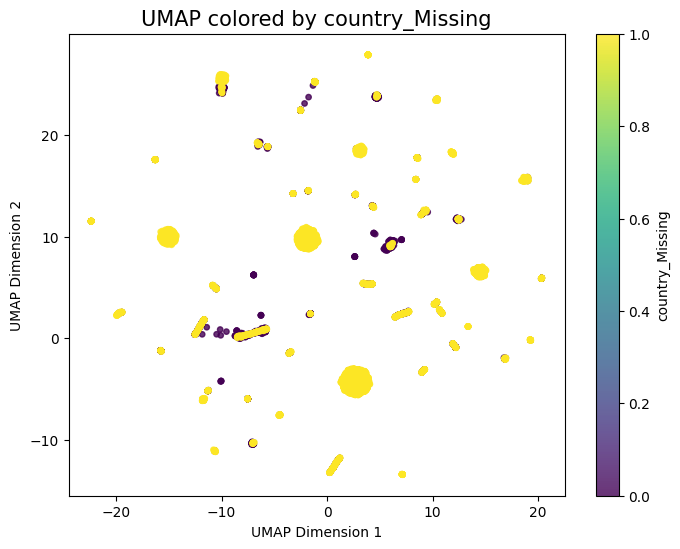

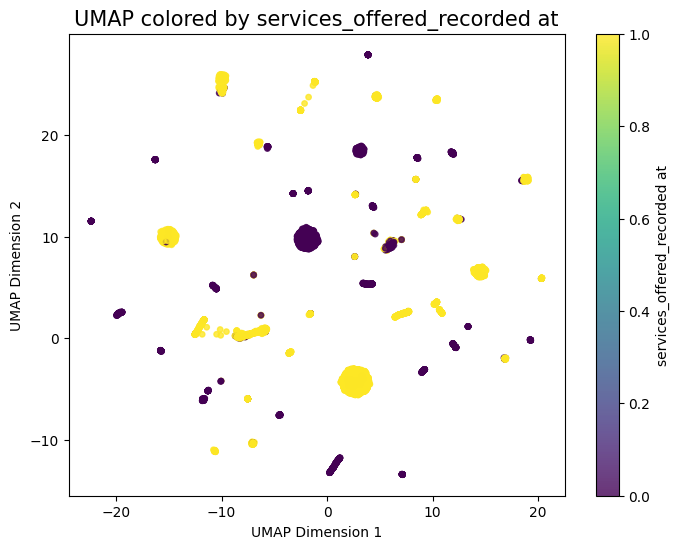

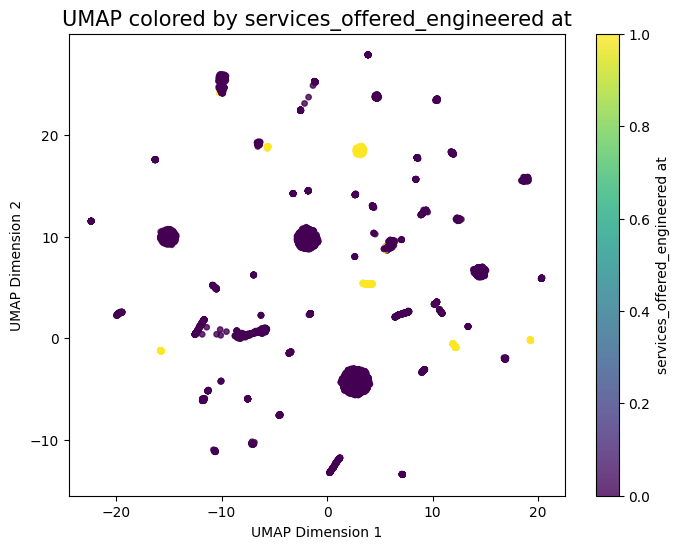

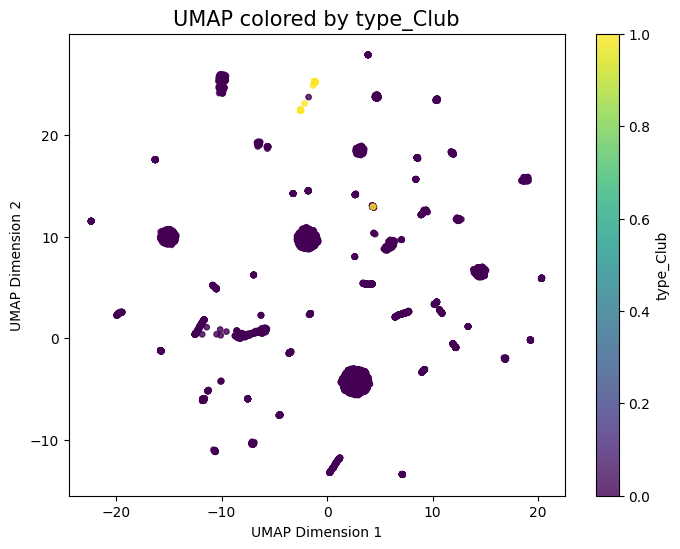

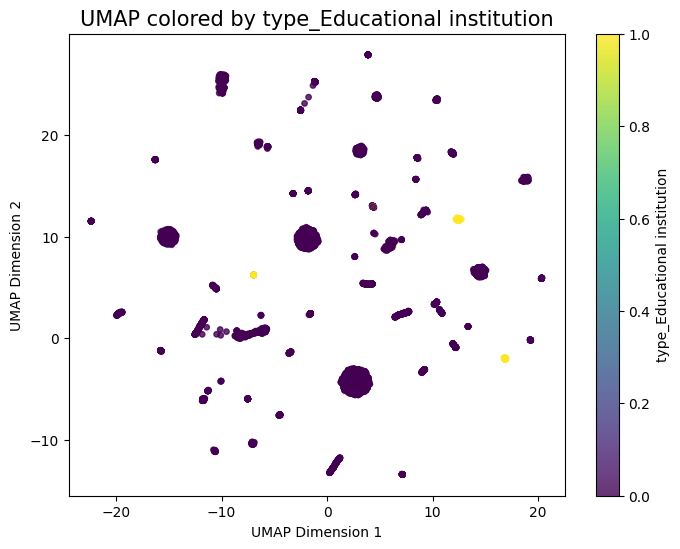

In [11]:
# Top 10 features correlated with UMAP Dimension 1
features_dim1 = [
    'type_Venue',
    'type_Missing',
    'type_Other',
    'type_Religious building',
    'type_Educational institution',
    'services_offered_produced at',
    'city_Missing',
    'country_Missing',
    'type_Concert hall / Theatre',
    'type_Park'
]

# Top 10 features correlated with UMAP Dimension 2
features_dim2 = [
    'type_Religious building',
    'type_Studio',
    'type_Other',
    'city_Missing',
    'country_Missing',
    'type_Club',
    'type_Indoor arena',
    'type_Stadium',
    'services_offered_engineered at',
    'services_offered_recorded at'
]

# Combine into one list (or keep them separate if you prefer)
features_to_examine = list(set(features_dim1 + features_dim2))


#Plot each feature in a loop

for feat in features_to_examine:
    if feat not in merged_df_encoded.columns:
        print(f"Warning: {feat} is not a column in merged_df_encoded.")
        continue
    
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_umap[:, 0],
        X_umap[:, 1],
        c=merged_df_encoded[feat],  # color by feature
        cmap='viridis',            # or another colormap (e.g., 'plasma', 'coolwarm')
        s=15,
        alpha=0.8
    )
    plt.colorbar(label=feat)
    plt.title(f'UMAP colored by {feat}', fontsize=15)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()
